# Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv('ushape.csv',header=None,usecols=[0,1,2]) # if there is no header in dataframe
df.columns = ['x','y','class']

In [3]:
df.head()

,x,y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [4]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [5]:
pr = PolynomialFeatures(degree=5)

In [6]:
X_tf = pr.fit_transform(X)

In [7]:
lg = LogisticRegression()

In [8]:
lg.fit(X_tf,y)

LogisticRegression()

In [9]:
y_pred = lg.predict(X_tf)

In [10]:
accuracy_score(y,y_pred)

0.93

In [11]:
 accuracy = np.mean(cross_val_score(lg,X_tf,y,scoring='accuracy',cv=10))

In [12]:
accuracy

0.9

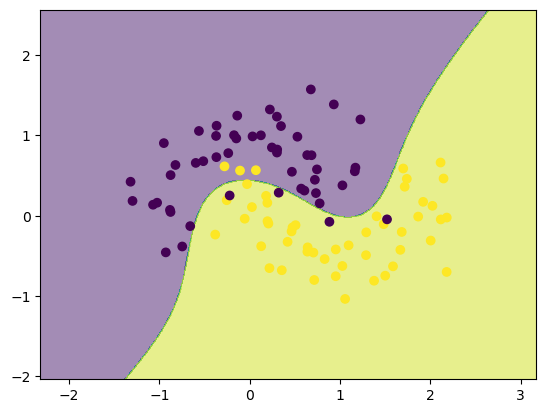

In [13]:
a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)

XX,YY=np.meshgrid(a,b)
    
input_array=np.array([XX.ravel(),YY.ravel()]).T

labels=lg.predict(pr.transform(input_array))
    
plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
plt.scatter(X[:,0],X[:,1], c=y)